In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [37]:
dt_clf = DecisionTreeClassifier(random_state=156,max_depth=None,min_samples_split=2, min_samples_leaf=2)
iris = load_iris()
x_train,x_test,y_train,y_test = train_test_split(iris.data,
                                                 iris.target,
                                                 test_size=0.2,
                                                 random_state=11)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_leaf=2, random_state=156)

In [38]:
from sklearn.tree import export_graphviz

In [39]:
export_graphviz(dt_clf,
                out_file='tree.dot',
                class_names=iris.target_names,
                feature_names=iris.feature_names,
                filled=True)

In [40]:
import graphviz

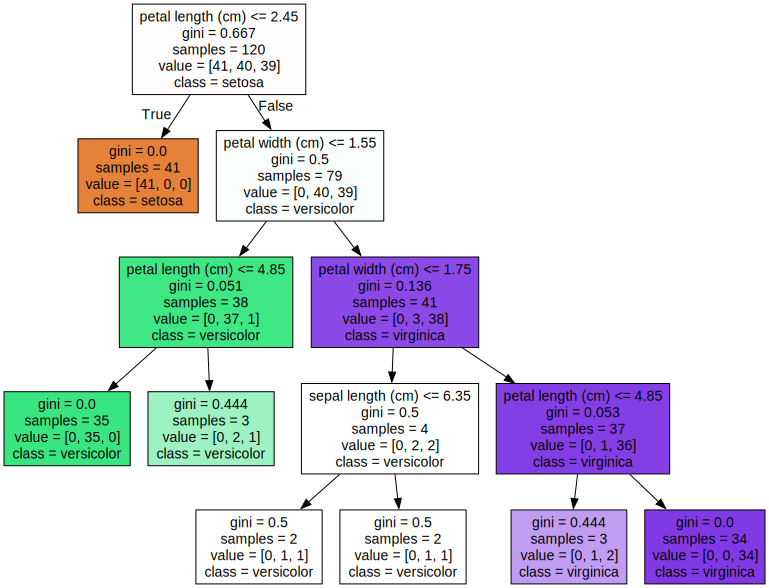

In [41]:
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [42]:
dt_clf.feature_importances_

array([0.        , 0.        , 0.55387887, 0.44612113])

In [43]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [44]:
import seaborn as sns
import numpy as np

In [45]:
for name, value in zip(iris.feature_names,dt_clf.feature_importances_):
    print(name,value)

sepal length (cm) 0.0
sepal width (cm) 0.0
petal length (cm) 0.5538788689655583
petal width (cm) 0.44612113103444173


<Axes: >

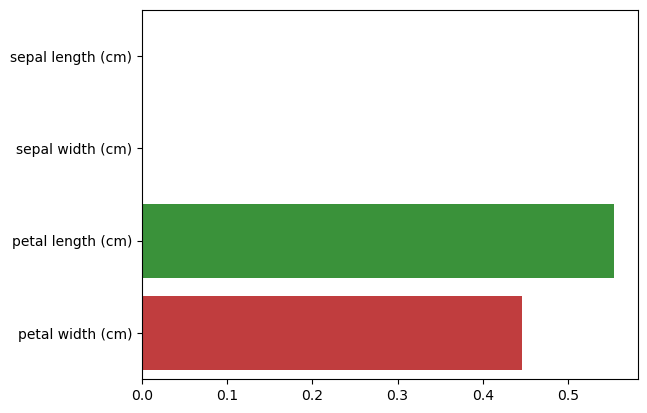

In [46]:
sns.barplot(x=dt_clf.feature_importances_,y=iris.feature_names)

In [47]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [48]:
x,y = make_classification(n_features=2,
                          n_classes=3,
                          n_clusters_per_class=1,
                          random_state=0,
                          n_redundant=0)

In [49]:
x,y

(array([[ 0.12041909, -1.68941375],
        [ 1.09665605,  1.79445113],
        [ 0.88426577,  1.43370121],
        [ 0.95048011, -0.56202253],
        [ 1.04421447,  0.02899023],
        [ 0.50102164, -1.27508231],
        [ 1.10447379,  0.35117341],
        [-2.5077599 ,  2.48857017],
        [-0.00811816,  0.11564734],
        [ 0.31338067, -0.87926516],
        [-0.04687748,  1.35489986],
        [ 1.20888898,  0.64232637],
        [ 1.71173001, -1.04637674],
        [ 1.29670808, -0.6054158 ],
        [ 1.24188996, -0.3819388 ],
        [-1.78273822,  1.52817583],
        [-1.50514147,  1.27186707],
        [ 0.87163989, -0.42276158],
        [ 2.53026908, -1.61974843],
        [ 0.95000368,  1.83240861],
        [-1.53716448, -0.89497353],
        [-2.13650855,  2.73389996],
        [ 1.01037788,  0.59402713],
        [ 1.9876467 , -0.22375521],
        [ 1.12463497,  2.13646176],
        [-0.65122279,  0.97865617],
        [ 0.85144036,  0.42548085],
        [-0.10789457, -0.659

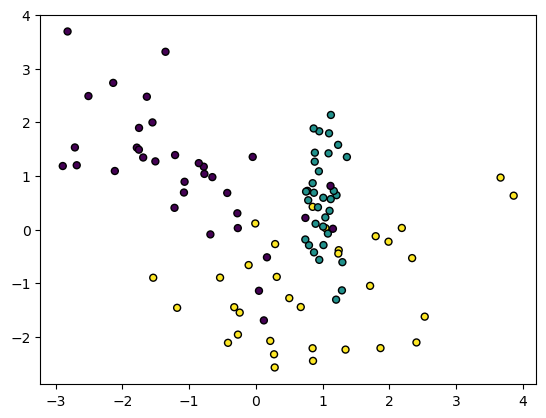

In [50]:
plt.scatter(x[:,0],
            x[:,1],
            marker='o',
            c=y,s=25,
            edgecolors='k')

In [51]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()

    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

C:\Users\admin\AppData\Local\Temp\ipykernel_7152\1582449568.py:21: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


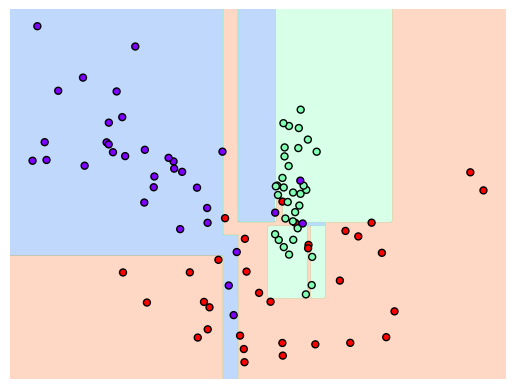

In [52]:
dt_clf = DecisionTreeClassifier(random_state=156).fit(x,y)
visualize_boundary(dt_clf,x,y)

C:\Users\admin\AppData\Local\Temp\ipykernel_7152\1582449568.py:21: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


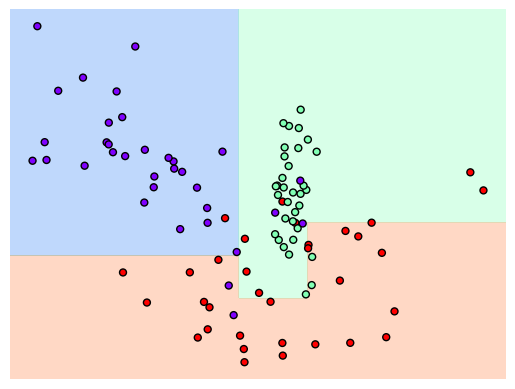

In [53]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(x,y)
visualize_boundary(dt_clf,x,y)